In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
mnist_train = torchvision.datasets.MNIST(root='~/test/Datasets/MNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='~/test/Datasets/MNIST',train=False, download=True, transform=transforms.ToTensor())
batch_size = 256
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size,shuffle=True, num_workers=2)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,shuffle=False, num_workers=2)

In [25]:
num_inputs,num_outputs,num_hiddens=784,10,256
W1=torch.tensor(np.random.normal(0,0.01,(num_hiddens,num_inputs)),dtype=torch.float)
b1=torch.zeros(num_hiddens,dtype=torch.float)
W2=torch.tensor(np.random.normal(0,0.01,(num_outputs,num_hiddens)),dtype=torch.float)
b2=torch.zeros(num_outputs,dtype=torch.float)

params=[W1,b1,W2,b2]
for param in params:
    param.requires_grad_(requires_grad=True)

In [4]:
def relu(X):
    return torch.max(input=X,other=torch.tensor(0.0))

In [5]:
import torch.nn as nn
loss = nn.CrossEntropyLoss()

In [6]:
def SGD(params,lr):
    for param in params:
        param.data-=lr*param.grad

In [26]:
def dropout(X,drop_prob):
    X = X.float()
    #检查丢弃概率是否在0到1之间
    assert 0 <= drop_prob <= 1
    keep_prob = 1 - drop_prob
    #这种情况下把元素全部丢弃
    if keep_prob == 0:
        return torch.zeros_like(X)
    #生成mask矩阵(向量)
    mask = (torch.rand(X.shape)<keep_prob).float()
    #按照mask进行对X进行变换
    return mask*X /keep_prob
drop_prob1,drop_prob2,drop_prob3,drop_prob4 = 0.2,0.4,0.6,0.9

In [27]:
def net(X,is_training=True):
    X=X.view((-1,num_inputs))
    H=relu(torch.matmul(X,W1.t())+b1)
    if is_training:
        H=dropout(H,drop_prob4)#在第一层全连接后进行dropout
    return torch.matmul(H,W2.t())+b2

In [9]:
def evaluate_accuracy(data_iter,net,loss):
    acc_sum,n=0.0,0
    test_l_sum=0.0
    for X,y in data_iter:       
        acc_sum+=(net(X,is_training=False).argmax(dim=1)==y).float().sum().item()
        l=loss(net(X,is_training=False),y).sum()
        test_l_sum+=l.item()
        n+=y.shape[0]
    return acc_sum/n,test_l_sum/n

In [10]:
def train(net,train_iter,test_iter,loss,num_epochs,batch_size,params=None,lr=None,optimizer=None):
    train_loss=[]
    test_loss=[]
    for epoch in range(num_epochs):
        train_l_sum,train_acc_sum,n=0.0,0.0,0
        for X,y in train_iter:
            y_hat = net(X)
            l=loss(y_hat,y).sum()
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            l.backward()
            if optimizer is None:
                SGD(params,lr)
            else:
                optimizer.step()
            train_l_sum+=l.item()
            train_acc_sum+=(y_hat.argmax(dim=1)==y).sum().item()
            n+=y.shape[0]
        test_acc,test_l = evaluate_accuracy(test_iter,net,loss)
        train_loss.append(train_l_sum/n)
        test_loss.append(test_l)
        print('epoch%d,loss%.4f,train acc %3f,test acc %.3f'%(epoch+1,train_l_sum/n,train_acc_sum/n,test_acc))
    return train_loss,test_loss

In [11]:
num_epochs=20
lr=0.1
train_loss1,test_loss1=train(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

epoch1,loss0.0041,train acc 0.730217,test acc 0.883
epoch2,loss0.0016,train acc 0.885217,test acc 0.908
epoch3,loss0.0013,train acc 0.904250,test acc 0.919
epoch4,loss0.0012,train acc 0.913700,test acc 0.927
epoch5,loss0.0011,train acc 0.922600,test acc 0.935
epoch6,loss0.0010,train acc 0.930100,test acc 0.939
epoch7,loss0.0009,train acc 0.936267,test acc 0.943
epoch8,loss0.0008,train acc 0.940300,test acc 0.948
epoch9,loss0.0008,train acc 0.945083,test acc 0.951
epoch10,loss0.0007,train acc 0.948533,test acc 0.953
epoch11,loss0.0007,train acc 0.951750,test acc 0.954
epoch12,loss0.0006,train acc 0.953567,test acc 0.957
epoch13,loss0.0006,train acc 0.956367,test acc 0.959
epoch14,loss0.0006,train acc 0.958833,test acc 0.962
epoch15,loss0.0005,train acc 0.961100,test acc 0.963
epoch16,loss0.0005,train acc 0.962133,test acc 0.964
epoch17,loss0.0005,train acc 0.963933,test acc 0.966
epoch18,loss0.0005,train acc 0.965483,test acc 0.966
epoch19,loss0.0005,train acc 0.967383,test acc 0.968
ep

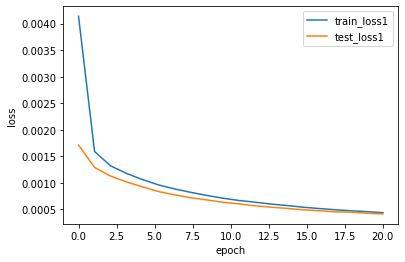

In [12]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0,len(train_loss1),len(train_loss1))
plt.plot(x,train_loss1,label='train_loss1',linewidth=1.5)
plt.plot(x,test_loss1,label='test_loss1',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [15]:
train_loss2,test_loss2=train(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

epoch1,loss0.0043,train acc 0.718733,test acc 0.887
epoch2,loss0.0017,train acc 0.877233,test acc 0.908
epoch3,loss0.0014,train acc 0.899283,test acc 0.924
epoch4,loss0.0012,train acc 0.910967,test acc 0.932
epoch5,loss0.0011,train acc 0.920900,test acc 0.939
epoch6,loss0.0010,train acc 0.928717,test acc 0.942
epoch7,loss0.0009,train acc 0.934867,test acc 0.948
epoch8,loss0.0008,train acc 0.939200,test acc 0.950
epoch9,loss0.0008,train acc 0.943367,test acc 0.955
epoch10,loss0.0007,train acc 0.947300,test acc 0.957
epoch11,loss0.0007,train acc 0.949233,test acc 0.960
epoch12,loss0.0007,train acc 0.951933,test acc 0.961
epoch13,loss0.0006,train acc 0.954767,test acc 0.962
epoch14,loss0.0006,train acc 0.957617,test acc 0.963
epoch15,loss0.0006,train acc 0.958933,test acc 0.965
epoch16,loss0.0006,train acc 0.959917,test acc 0.967
epoch17,loss0.0005,train acc 0.961450,test acc 0.968
epoch18,loss0.0005,train acc 0.962650,test acc 0.969
epoch19,loss0.0005,train acc 0.962783,test acc 0.970
ep

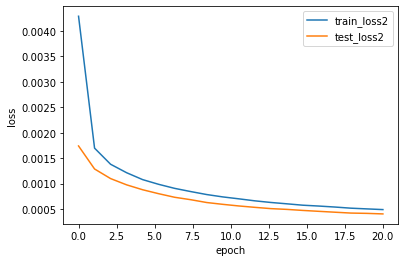

In [16]:
x=np.linspace(0,len(train_loss2),len(train_loss2))
plt.plot(x,train_loss2,label='train_loss2',linewidth=1.5)
plt.plot(x,test_loss2,label='test_loss2',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [19]:
train_loss3,test_loss3=train(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

epoch1,loss0.0045,train acc 0.689417,test acc 0.883
epoch2,loss0.0019,train acc 0.864533,test acc 0.906
epoch3,loss0.0015,train acc 0.890167,test acc 0.922
epoch4,loss0.0013,train acc 0.905217,test acc 0.930
epoch5,loss0.0012,train acc 0.913633,test acc 0.936
epoch6,loss0.0011,train acc 0.922033,test acc 0.943
epoch7,loss0.0010,train acc 0.926250,test acc 0.947
epoch8,loss0.0009,train acc 0.931483,test acc 0.950
epoch9,loss0.0009,train acc 0.935217,test acc 0.952
epoch10,loss0.0009,train acc 0.938450,test acc 0.955
epoch11,loss0.0008,train acc 0.942283,test acc 0.956
epoch12,loss0.0008,train acc 0.944250,test acc 0.959
epoch13,loss0.0007,train acc 0.946967,test acc 0.961
epoch14,loss0.0007,train acc 0.948000,test acc 0.963
epoch15,loss0.0007,train acc 0.949250,test acc 0.963
epoch16,loss0.0007,train acc 0.951633,test acc 0.964
epoch17,loss0.0006,train acc 0.953650,test acc 0.965
epoch18,loss0.0006,train acc 0.955167,test acc 0.966
epoch19,loss0.0006,train acc 0.956633,test acc 0.968
ep

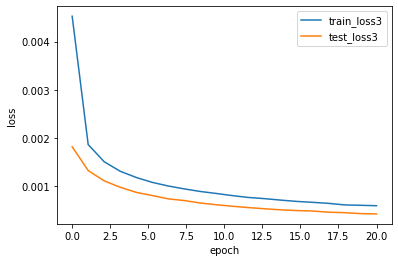

In [20]:
x=np.linspace(0,len(train_loss3),len(train_loss3))
plt.plot(x,train_loss3,label='train_loss3',linewidth=1.5)
plt.plot(x,test_loss3,label='test_loss3',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [28]:
train_loss4,test_loss4=train(net,train_iter,test_iter,loss,num_epochs,batch_size,params,lr)

epoch1,loss0.0055,train acc 0.555850,test acc 0.872
epoch2,loss0.0030,train acc 0.763700,test acc 0.900
epoch3,loss0.0025,train acc 0.807600,test acc 0.911
epoch4,loss0.0023,train acc 0.825733,test acc 0.916
epoch5,loss0.0021,train acc 0.837233,test acc 0.923
epoch6,loss0.0020,train acc 0.845733,test acc 0.927
epoch7,loss0.0019,train acc 0.848800,test acc 0.932
epoch8,loss0.0019,train acc 0.854350,test acc 0.934
epoch9,loss0.0018,train acc 0.856217,test acc 0.935
epoch10,loss0.0018,train acc 0.857900,test acc 0.936
epoch11,loss0.0018,train acc 0.863483,test acc 0.939
epoch12,loss0.0017,train acc 0.863650,test acc 0.943
epoch13,loss0.0017,train acc 0.864767,test acc 0.943
epoch14,loss0.0017,train acc 0.867567,test acc 0.945
epoch15,loss0.0017,train acc 0.867817,test acc 0.945
epoch16,loss0.0017,train acc 0.869283,test acc 0.947
epoch17,loss0.0017,train acc 0.871167,test acc 0.947
epoch18,loss0.0016,train acc 0.872400,test acc 0.948
epoch19,loss0.0016,train acc 0.871550,test acc 0.949
ep

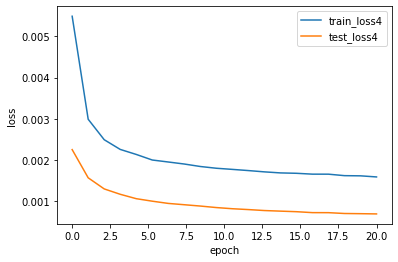

In [29]:
x=np.linspace(0,len(train_loss4),len(train_loss4))
plt.plot(x,train_loss4,label='train_loss4',linewidth=1.5)
plt.plot(x,test_loss4,label='test_loss4',linewidth=1.5)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()